# Feature Preparation

**Feature Preparation** — это процесс использования предметной области данных для создания признаков и отбора признаков, которые нужны для обучения машин. 

Когда ваша цель — получить наилучшие возможные результаты от предсказательной модели, вам нужно максимально использовать то, что у вас есть.

Это включает в себя получение наилучших результатов от используемых вами алгоритмов. Но это также включает в себя получение максимальной отдачи от данных, с которыми будут работать ваши алгоритмы. И на текущий момент во многих практических задачах стоящих перед Data Science специалистами определяющим фактором является именно качество фичей нежели поиск подходящих архитектур и оптимизация их параметров, что мы и увидим из последующих лекций.
Здесь и далее мы будем использовать связку равных определений признаки-features (фичи), что означают качество или свойство, присущее всем независимым объектам, анализ которых или прогноз для которых мы делаем.
![](Picture1.jpg)

Итак, нам нужны "крутые" features, но что они могут нам дать для решения задачи?

1) "Крутые" features означают гибкость.
    Вы можете выбрать «не те модели» (менее оптимальные) и все равно получить хорошие результаты. Большинство моделей могут улавливать(более чувствительны) хорошую структуру данных. Гибкость хороших features позволит нам использовать менее сложные модели, которые быстрее запускаются, легче интерпретируются и проще развертываются. Это крайне важный момент.
2) "Крутые" features означают более простые модели.
    С хорошо подобранными features вы можете выбрать «неправильные параметры» (менее оптимальные) и все же получить хорошие результаты по тем же причинам, что и выше. Процесс подбора правильных моделей и оптимизации параметров значительно упрощается.
3) "Крутые" features дают более глубокое понимание сути предсказываемого процесса и его связей с другими процессами
4) "Крутые" features, что самое главное и простое, означают лучшие результаты моделей и решений основанных на них.

Как же получить максимальную отдачу от данных для моделирования, где взять "крутые фичи" ?
Именно эту задачу решает процесс Feature Preparation.

Feature Preparation можно разделить на два параллельных процесса: это создание новых фичей - **Feature Engineering**, и отбор фичей - **Feature Selection**.

![](DS_Pipe_FE.png)

В первую очередь подробно рассмотрим именно часть, связанную с **Feature Engineering** .
Этот итеративный процесс отвечает за создание и разработку новых фичей из имеющихся, для расширения пространства признаков и повышения вероятности найти наиболее "крутые" фичи за счет этого.


В практическом смысле для Feature Engineering характерен быстрый рост общего числа признаков, так называемый **Feature explosion**, который может быть вызван путём создания:
* Шаблонов признаков – разбиение признаков на составные части вместо кодирования новых признаков
* Комбинации признаков – создание нового признака из нескольких первичных, которые не могут быть представлены в виде линейной комбинации



## Шаблоны признаков
1) Работа с датами/временем
    Возможные преобразования можно найти в документации к pandas: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
2) Работа с телефонами, адресами, названиями


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

accidents = pd.read_csv("accidents.csv")
autos = pd.read_csv("autos.csv")
concrete = pd.read_csv("concrete.csv")
customer = pd.read_csv("customer.csv")

### Пример выделения шаблонов даты и времени

In [12]:
#Пример для даты и времени
accidents['StartTime'].head()

0    2019-07-22 14:43:06
1    2019-03-20 16:12:14
2    2018-12-12 14:19:18
3    2018-03-09 08:02:11
4    2020-03-27 05:36:56
Name: StartTime, dtype: object

In [13]:

"""
# get templates from time
accidents["StartTimeDay_year"] = accidents["StartTime"].dt.year
accidents["StartTimeDay_month"] = accidents["StartTime"].dt.month
accidents["StartTimeDay_week"] = accidents["StartTime"].dt.week
accidents["StartTimeDay_day"] = accidents["StartTime"].dt.day
accidents["StartTimeDay_hour"] = accidents["StartTime"].dt.hour
accidents["StartTimeDay_minute"] = accidents["StartTime"].dt.minute
accidents["StartTimeDay_dayofweek"] = accidents["StartTime"].dt.dayofweek
accidents[
    [
        "StartTime",
        "StartTimeDay_year",
        "StartTimeDay_month",
        "StartTimeDay_week",
        "StartTimeDay_day",
        "StartTimeDay_hour",
        "StartTimeDay_minute",
        "StartTimeDay_dayofweek",
    ]
].head()
"""

'\n# get templates from time\naccidents["StartTimeDay_year"] = accidents["StartTime"].dt.year\naccidents["StartTimeDay_month"] = accidents["StartTime"].dt.month\naccidents["StartTimeDay_week"] = accidents["StartTime"].dt.week\naccidents["StartTimeDay_day"] = accidents["StartTime"].dt.day\naccidents["StartTimeDay_hour"] = accidents["StartTime"].dt.hour\naccidents["StartTimeDay_minute"] = accidents["StartTime"].dt.minute\naccidents["StartTimeDay_dayofweek"] = accidents["StartTime"].dt.dayofweek\naccidents[\n    [\n        "StartTime",\n        "StartTimeDay_year",\n        "StartTimeDay_month",\n        "StartTimeDay_week",\n        "StartTimeDay_day",\n        "StartTimeDay_hour",\n        "StartTimeDay_minute",\n        "StartTimeDay_dayofweek",\n    ]\n].head()\n'

In [14]:
'''fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=accidents, x="StartTimeDay_week", bins=52, ax=ax[0])
sns.histplot(data=accidents, x="StartTimeDay_dayofweek", bins=7, ax=ax[1])
'''

'fig, ax = plt.subplots(1, 2, figsize=(12, 6))\nsns.histplot(data=accidents, x="StartTimeDay_week", bins=52, ax=ax[0])\nsns.histplot(data=accidents, x="StartTimeDay_dayofweek", bins=7, ax=ax[1])\n'

### Пример шаблонов для телефонов, адресов, текстовых полей

In [15]:
template_df=pd.DataFrame.from_dict({
    'phone_number':['+7 (495) 408-45-54'],
    'address':['9 Institutskiy per., Dolgoprudny, Moscow Region, 141700, Russian Federation']},)
template_df.head()

,phone_number,address
0,+7 (495) 408-45-54,"9 Institutskiy per., Dolgoprudny, Moscow Regio..."


In [16]:
template_df["phone_code"] = template_df["phone_number"].apply(lambda x: x.split(" ")[0])
template_df["phone_region"] = template_df["phone_number"].apply(
    lambda x: x.split(" ")[1]
)
template_df["phone_main"] = template_df["phone_number"].apply(lambda x: x.split(" ")[2])
template_df.head()


,phone_number,address,phone_code,phone_region,phone_main
0,+7 (495) 408-45-54,"9 Institutskiy per., Dolgoprudny, Moscow Regio...",+7,(495),408-45-54


In [17]:
template_df["address_street"] = template_df["address"].apply(lambda x: x.split(",")[0])
template_df["address_city"] = template_df["address"].apply(lambda x: x.split(",")[1])
template_df["address_region"] = template_df["address"].apply(lambda x: x.split(",")[2])
template_df["address_postalcode"] = template_df["address"].apply(
    lambda x: x.split(",")[3]
)
template_df["address_country"] = template_df["address"].apply(lambda x: x.split(",")[4])
template_df.head()


,phone_number,address,phone_code,phone_region,phone_main,address_street,address_city,address_region,address_postalcode,address_country
0,+7 (495) 408-45-54,"9 Institutskiy per., Dolgoprudny, Moscow Regio...",+7,(495),408-45-54,9 Institutskiy per.,Dolgoprudny,Moscow Region,141700,Russian Federation


Также в работе с адресами всегда можно воспользоваться библиотекой *geocoder* (https://geocoder.readthedocs.io/index.html) или *geopy* (https://geopy.readthedocs.io/en/latest/#specifying-parameters-once), с помощью которой получится вытащить такие геоданные как координаты,высоту над уровнем моря (не всегда), таймзону и заодно готовый шаблон по заданному адресу. Работает библиотека через API сервис со стандартной логикой post/get request. 
Данная библиотека позволяет получать данные из различных доступных API, таких как Google Maps, Yandex Maps, ArcGIS и тд.
Для работы с данной библиотекой необходимо завести у необходимых сервисов API Keys на их сайтах и прописать параметры внутри библиотеки. 
И будьте готовы к тому, что при работе с любой библиотекой на базе API сервисов, придется много парсить json файлы для получения красивых данных.

In [18]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="I")
location1 = geolocator.geocode("175 5th Avenue NYC")
location2 = geolocator.geocode("2, Bolshaya Lubyanka street, Moscow")
(latitude, longitude) = location1[1]
print(f"latitude={latitude},longitude={longitude}")


latitude=40.741059199999995,longitude=-73.98964162240998


In [19]:
type(location1)

geopy.location.Location

In [20]:
location1

Location(Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States, (40.741059199999995, -73.98964162240998, 0.0))

In [21]:
location2

Location(2, улица Большая Лубянка, Мещанский район, Москва, Центральный федеральный округ, 109012, Россия, (55.76084755, 37.62864445631705, 0.0))

## Комбинации 
Теперь перейдем к построению комбинаций и различных техникам с особыми видами данных.
В следующем списке представлены некоторые типичные способы разработки полезных функций:

1) Числовые преобразования (например, дроби или масштабирование)
2) Кодировщик категории, такой как Label encoding или One-hot encoding
3) Биннинг и переход в категориальность
4) Сравнения со агрегатами
5) Построение признаков: построение новых «физических», основанных на знаниях параметров, имеющих отношение к проблеме.
6) Работа с координатами, расстояниями, кластерами
7) Работа с временными рядами: скользящее среднее, накопленное среднее

### Числовые преобразования
Данные преобразования не должны иметь возможности быть представленными линейными комбинациями, чтобы модель не могла распознать эту трансформацию.
Поэтому чаще всего используют умножение, деление, возведение в степени, логарифмирование, взятие корней и проч.
Также их возможно использовать как с одной фичей так и создавать комбинации из нескольких фичей.

In [22]:
columns = concrete.columns.values.tolist()
len(columns)

8

In [23]:
for i in range(len(columns)):
    concrete = concrete.join(
        concrete.loc[:, [x for x in columns if x != columns[i]]].div(
            concrete[columns[i]], axis=0
        ),
        how="left",
        rsuffix=f"_to_{columns[i]}",
    )


In [24]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,BlastFurnaceSlag_to_Cement,FlyAsh_to_Cement,...,Superplasticizer_to_FineAggregate,CoarseAggregate_to_FineAggregate,Age_to_FineAggregate,Cement_to_Age,BlastFurnaceSlag_to_Age,FlyAsh_to_Age,Water_to_Age,Superplasticizer_to_Age,CoarseAggregate_to_Age,FineAggregate_to_Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.000000,0.0,...,0.003698,1.538462,0.041420,19.285714,0.000000,0.0,5.785714,0.089286,37.142857,24.142857
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.000000,0.0,...,0.003698,1.560651,0.041420,19.285714,0.000000,0.0,5.785714,0.089286,37.678571,24.142857
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.428571,0.0,...,0.000000,1.569024,0.454545,1.231481,0.527778,0.0,0.844444,0.000000,3.451852,2.200000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.428571,0.0,...,0.000000,1.569024,0.614478,0.910959,0.390411,0.0,0.624658,0.000000,2.553425,1.627397
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.666667,0.0,...,0.000000,1.185221,0.436099,0.551667,0.367778,0.0,0.533333,0.000000,2.717778,2.293056


Именно на этих этапах происходит взрыв количества признаков, ввиду степенного роста финального набора фичей.
Также на данном этапе может показаться, что сгенерированные признаки могут не иметь никакого смысла, однако на практике оказывается, что далеко не все признаки с первого взгляда понятны, однако могут иметь при этом достаточно сильные характеристики важности для модели. 

In [25]:
concrete.shape

(1030, 64)

### Кодировка категориальных признаков
Категориальные признаки представляют собой типы данных, которые можно разделить на группы. Например, пол и уровень образования.

Любые нечисловые значения необходимо преобразовать в целые числа или числа с плавающей запятой, чтобы их можно было использовать в большинстве библиотек машинного обучения.

Общие методы обработки категориальных признаков:

## Frequency Encoding
Категории заменяются частотой появления категории в этой переменной. Обратите внимание, что когда некоторые категории имеют одинаковые частоты мы теряем информацию об исходных данных.

<AxesSubplot:xlabel='State', ylabel='Count'>

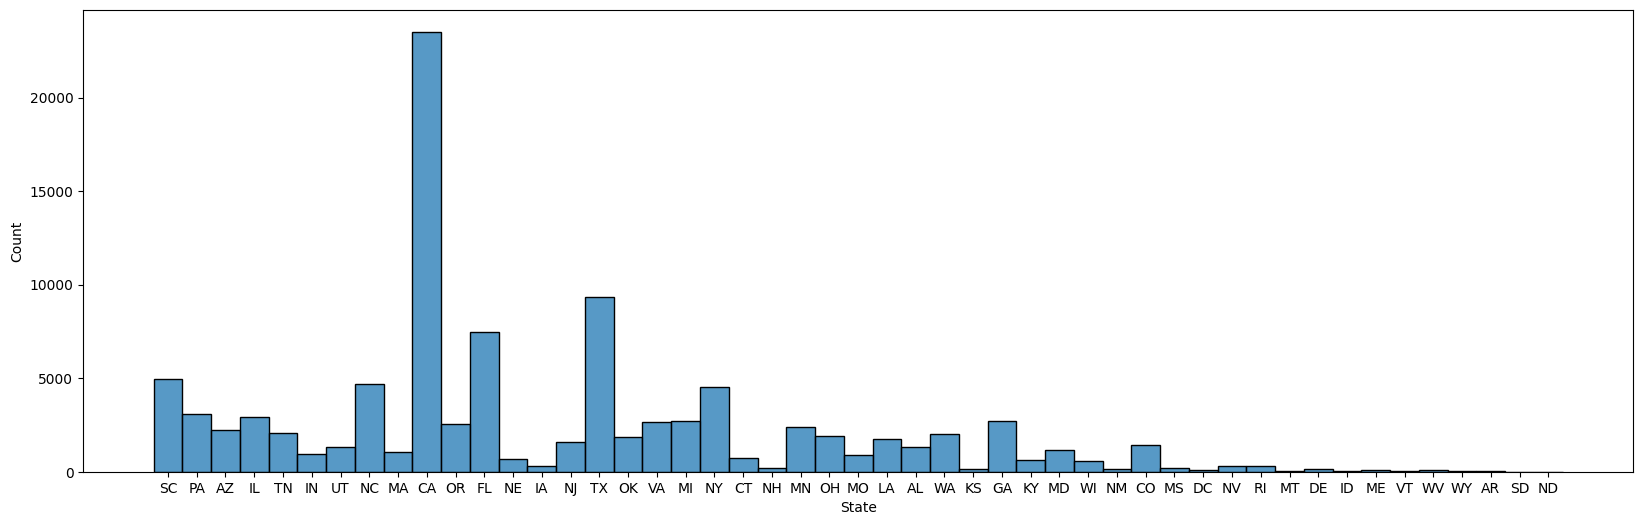

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6))
sns.histplot(data=accidents,x='State')

In [27]:
categorical_cols = ["State"]
for col in categorical_cols:
    # create frequency encoder
    freq_encoder = accidents.groupby(col).size() / len(accidents)
    # fit_transform for accidents
    accidents[col + "_freq"] = accidents[col].apply(lambda x: freq_encoder[x])
accidents[[col, col + "_freq"]].drop_duplicates().sort_values(by=col + "_freq", ascending=False).head(10)


,State,State_freq
9,CA,0.23526
17,TX,0.09363
11,FL,0.07458
0,SC,0.04972
7,NC,0.04706
26,NY,0.04551
1,PA,0.03092
3,IL,0.02914
102,GA,0.02721
24,MI,0.02697


### Label encoding 
Этот подход очень прост и включает в себя преобразование каждого значения в столбце в число.
![](Label_Encode.png)


In [28]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
accidents["State_Encoded"] = label_encoder.fit_transform(accidents["State"])

accidents.groupby(["State", "State_Encoded"]).size().to_frame()


,,0
State,State_Encoded,
AL,0,1304
AR,1,53
AZ,2,2216
CA,3,23526
CO,4,1431
CT,5,736
DC,6,112
DE,7,165
FL,8,7458


### One-hot encoding
На сегодняшний день наиболее распространенным способом представления категориальных переменных является использование прямого кодирования или методов кодирования «один из N», также известных как фиктивные переменные.

Идея фиктивных переменных состоит в том, чтобы заменить категориальную переменную одной или несколькими новыми функциями, которые могут иметь значения 0 и 1.
![](OH_Encode.png)

In [29]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown="ignore")
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(accidents[["State"]]).toarray())
# merge with main df bridge_df on key values
accidents = accidents.join(enc_df)
accidents.groupby(["State"] + accidents.columns.to_list()[-49:]).size().to_frame()


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
State,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,
AL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1304
AR,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
AZ,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2216
CA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23526
CO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1431
CT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736
DC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112
DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165
FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7458


### Target encoding
Target encoding — один из волшебных методов разработки признаков для категориальных данных. Основная идея заключается в использовании статистики категорий по отношению к целевой переменной для кодирования исходных категорий.

Что касается недостатков Target encoding, то первый недостаток такой же, как и у частотного кодирования — ненадежный. Информация может быть потеряна во время этого преобразования, особенно когда ожидаемые значения целевой переменной очень близки для разных категорий. Еще одним недостатком является высокий риск data leakage из-за вовлечения в расчет целевой переменной.

Учитывая последний минус, мы не будем останавливаться на этом методе, но просто знать о нем необходимо. Более подробную информацию можно получить здесь: https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69

### Bining
Метод означает разделение вещественных числовых признаков на отдельные группы, которые лучше подчеркивают важные тенденции в ваших данных.

In [30]:
elec=pd.read_csv('elections_2020.csv')

<AxesSubplot:xlabel='birth_year', ylabel='Count'>

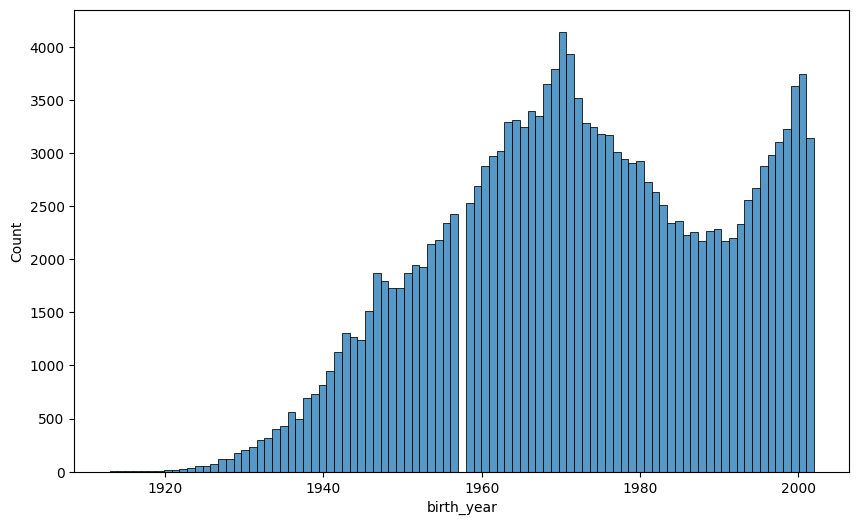

In [31]:
figure(figsize=(10, 6))
sns.histplot(data=elec,x='birth_year')

In [32]:
## Define function for grouping into generation categories by birth year
def get_gen_grp(birth_year):
    
    if birth_year < 1946:
        return 'Greatest-Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'
    
    else:
        return 'Missing'

<AxesSubplot:xlabel='generation', ylabel='Count'>

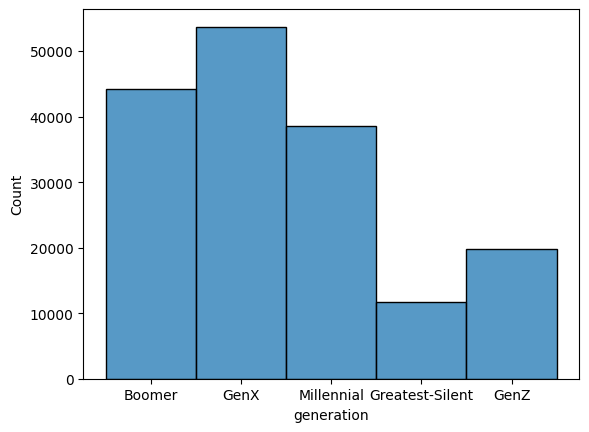

In [33]:

elec['generation'] = elec['birth_year'].apply(get_gen_grp)
sns.histplot(data=elec,x='generation')

### Сравнения со агрегатами
Данный метод подразумевает добавление как самих значений mean, max, min, median, var, std, и count, так и относительные комбинации с ними, как разбивая агрегаты по категориям, так и считая по всему набору данных

In [34]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)
customer['Income_ratio']=customer['Income']/customer['AverageIncome']

customer[["State", "Income", "AverageIncome",'Income_ratio']].head(10)

,State,Income,AverageIncome,Income_ratio
0,Washington,56274,38122.733083,1.476127
1,Arizona,0,37405.402231,0.000000
2,Nevada,48767,38369.605442,1.270980
3,California,0,37558.946667,0.000000
4,Washington,43836,38122.733083,1.149865
5,Oregon,62902,37557.283353,1.674828
6,Oregon,55350,37557.283353,1.473749
7,Arizona,0,37405.402231,0.000000
8,Oregon,14072,37557.283353,0.374681
9,Oregon,28812,37557.283353,0.767148


### Построение признаков: построение новых «физических», основанных на знаниях параметров, имеющих отношение к проблеме.
Отношения между числовыми характеристиками часто выражаются с помощью математических формул, с которыми вы часто будете сталкиваться при изучении предметной области. В Pandas вы можете применять арифметические операции к столбцам так же, как если бы они были обычными числами.

В наборе данных auto есть функции, описывающие двигатель автомобиля. Исследования дают множество формул для создания потенциально полезных новых функций. Например, «коэффициент хода» является мерой того, насколько эффективен двигатель:

In [35]:
#stroke - ход поршня
#bore - диаметр поршня
autos["stroke_ratio"] = autos.stroke / autos.bore

autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


Чем сложнее комбинация, тем сложнее будет модели изучить, например, эту формулу для «рабочего объема» двигателя, меру его мощности:

In [36]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)
autos[["displacement"]].head()

,displacement
0,101.377976
1,101.377976
2,117.446531
3,108.695147
4,135.868934


Визуализация данных может предложить преобразования, часто «изменение» функции с помощью степеней или логарифмов. Например, распределение WindSpeed в авариях в США сильно искажено. В этом случае логарифм эффективен для его нормализации:

/var/folders/n5/jpty6b8s6nq8fkv2nw21rgzw0000gn/T/ipykernel_45297/3343200215.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
/var/folders/n5/jpty6b8s6nq8fkv2nw21rgzw0000gn/T/ipykernel_45297/3343200215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);


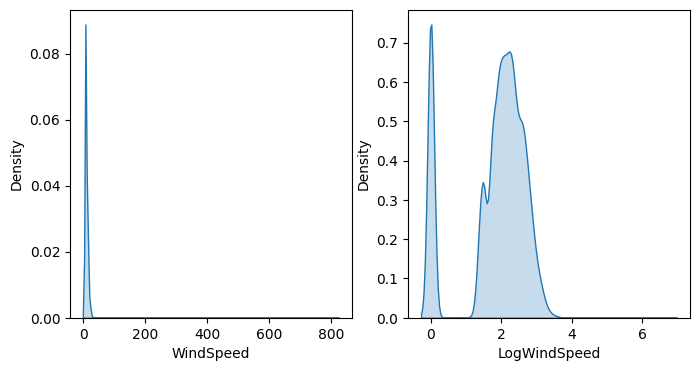

In [37]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);